In [29]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_excel('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Project 2 (P170) -- Hotel Rating Classification\\hotel_reviews.xlsx')

In [7]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [9]:
df.shape

(20491, 2)

In [71]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

<AxesSubplot:>

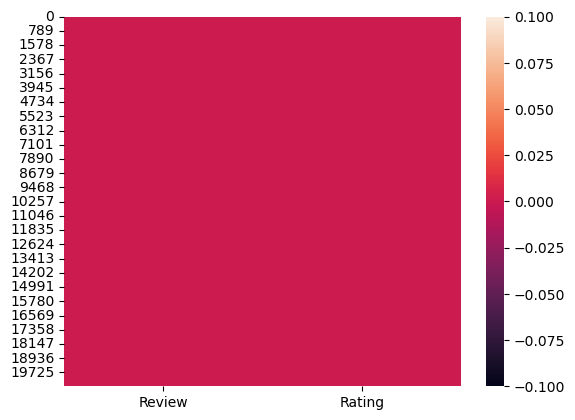

In [72]:
sns.heatmap(df.isnull())

In [16]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [19]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [62]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

<AxesSubplot:>

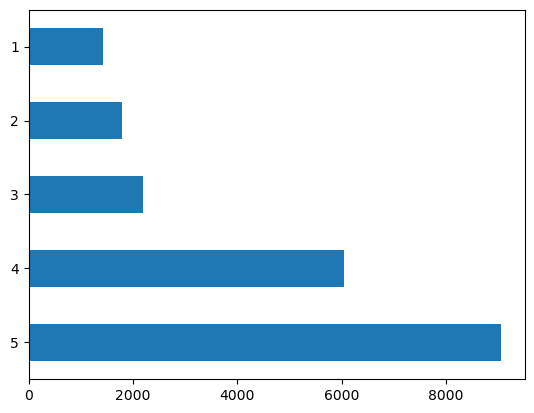

In [68]:
df['Rating'].value_counts().plot(kind='barh')


In [69]:
df['Rating'].describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

C:\Users\kkdk0001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

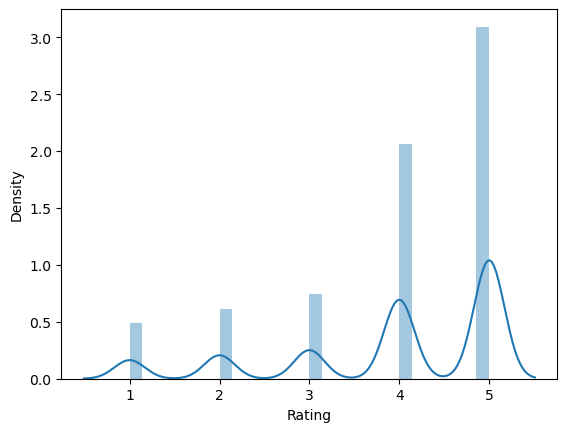

In [76]:
sns.distplot(df['Rating'])

# Data Cleaning 

In [79]:
# Regular Expression 

In [80]:
import re
import string

In [ ]:
# Defining a function which makes all text to lowercas,removes brackets, punctuation and numbers

In [81]:

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('[0-9]" "]+'," ",text)
    text = re.sub('[''""..]','',text)
    return text

clean = lambda x:clean_text(x)
    

In [83]:
df['Review']= df.Review.apply(clean)

In [85]:
df.head(3)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not experience hotel monaco seattl...,3


In [86]:
# Word Frequency 

In [97]:
frequency = pd.Series(' '.join(df['Review']).split()).value_counts()[:20]

In [98]:
frequency

hotel       48832
room        34300
not         31525
great       21087
nt          18989
good        16972
staff       16203
stay        15153
did         13892
just        12589
nice        12399
rooms       12015
no          11603
location    11032
stayed      10466
service      9961
time         9816
beach        9581
night        9423
clean        9359
dtype: int64

<AxesSubplot:>

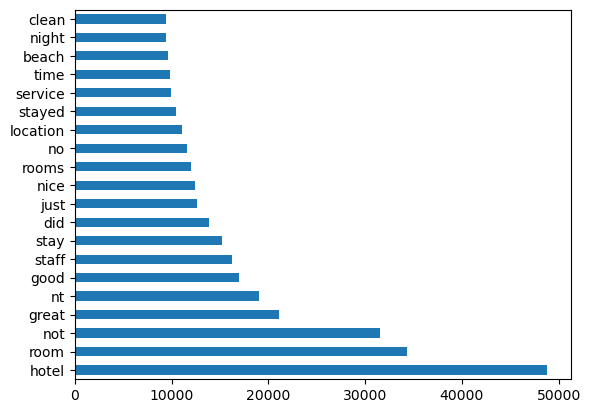

In [100]:
frequency.plot(kind='barh')

In [101]:
# Removal of STOP WORDS

In [102]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [106]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [107]:
# Word Frequency after removal of STOP WORDS

In [110]:
frequency2 = pd.Series(' '.join(df['Review']).split()).value_counts()[:20]

<AxesSubplot:>

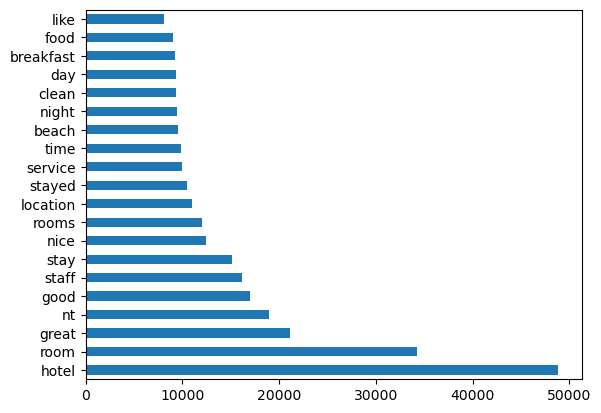

In [113]:
frequency2.plot(kind='barh')

In [115]:
frequency2

hotel        48832
room         34300
great        21087
nt           18989
good         16972
staff        16203
stay         15153
nice         12399
rooms        12015
location     11032
stayed       10466
service       9961
time          9816
beach         9581
night         9423
clean         9359
day           9340
breakfast     9271
food          8990
like          8112
dtype: int64